In [1]:
#Libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from pandas.io.json import json_normalize
import pickle
import os 
import sys
from IPython.core.pylabtools import figsize

# Datos históricos

In [2]:
pathAPI = os.getcwd()
pathData = os.path.join(pathAPI,'data')

# API URL Compound, https://compound.finance/docs/api#MarketHistoryService
urlcomp = 'https://api.compound.finance/api/v2/market_history/graph'

#Assets
cETH = '0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5'
cSAI = '0xf5dce57282a584d2746faf1593d3121fcac444dc'
cDAI = '0x5d3a536e4d6dbd6114cc1ead35777bab948e3643'
cUSDC = '0x39aa39c021dfbae8fac545936693ac917d5e7563'
cBAT = '0x6c8c6b02e7b2be14d4fa6022dfd6d75921d90e4e'
cUSDT = '0xf650c3d88d12db855b8bf7d11be6c55a4e07dcc9'

#Time Frame
startT='19-10-01 00:00:00'
endT='21-03-27 00:00:00'
startT=datetime.strptime(startT, '%y-%m-%d %H:%M:%S')
endT=datetime.strptime(endT, '%y-%m-%d %H:%M:%S')

#To Unix time stamp
UstartT=datetime.timestamp(startT)
UendT=datetime.timestamp(endT)

#Frequency Dayly data
freqD=abs((endT - startT).days)

params = {"asset": cETH,
 "min_block_timestamp": int(UstartT),
 "max_block_timestamp": int(UendT),
 "num_buckets": freqD}

params

{'asset': '0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5',
 'min_block_timestamp': 1569906000,
 'max_block_timestamp': 1616821200,
 'num_buckets': 543}

In [3]:
response = requests.get(urlcomp,params)
cethHD = response.json()

#Save Data
# f = open(os.path.join(pathData,'cETH_daily.pickle'), 'wb')
# pickle.dump(cethHD, f,-1)          
# f.close()

#Load Downloaded Data
# f = open(os.path.join(pathData,'cETH_daily.pickle'), 'rb')
# cethHD = pickle.load(f)     
#  f.close()

In [4]:
cethHD.keys()

dict_keys(['asset', 'borrow_rates', 'error', 'exchange_rates', 'prices_usd', 'supply_rates', 'total_borrows_history', 'total_supply_history'])

In [5]:
# Retrive data

# Tasas
# Borrow Rate
BorR = json_normalize(cethHD['borrow_rates'],sep="_")
BorR['rate'] = BorR['rate'].astype(float)
BorR.index = pd.to_datetime(BorR['block_timestamp'], unit='s')
BorR = BorR.rate

# Supply Rate
SupR = json_normalize(cethHD['supply_rates'],sep="_")
SupR['rate'] = SupR['rate'].astype(float)
SupR.index = pd.to_datetime(SupR['block_timestamp'], unit='s')
SupR = SupR.rate

# Tasa de utilización
UtiR = pd.Series((SupR.values/(BorR.values*(1-0.3))),index=BorR.index) #Reserve Factor 20%

# Cantidades

# Total Supply
TSup = json_normalize(cethHD['total_supply_history'],sep="_")
TSup['total_value'] = TSup['total_value'].astype(float)
TSup.index = pd.to_datetime(TSup['block_timestamp'], unit='s')
TSup = TSup.total_value

# Total Borrow
TBor = json_normalize(cethHD['total_borrows_history'],sep="_")
TBor['total_value'] = TBor['total_value'].astype(float)
TBor.index = pd.to_datetime(TBor['block_timestamp'], unit='s')
TBor = TBor.total_value

# Otros

# ExchangeRate
Xrate = json_normalize(cethHD['exchange_rates'],sep="_")
Xrate['rate'] = Xrate['rate'].astype(float)
Xrate.index = pd.to_datetime(Xrate['block_timestamp'], unit='s')
Xrate = Xrate.rate

# Precio
PUSD = json_normalize(cethHD['prices_usd'],sep="_")
PUSD['price_value'] = PUSD['price_value'].astype(float)
PUSD.index = pd.to_datetime(PUSD['block_timestamp'], unit='s')
PUSD = PUSD.price_value

<ipython-input-5-d1821c2af7fd>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  BorR = json_normalize(cethHD['borrow_rates'],sep="_")
<ipython-input-5-d1821c2af7fd>:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  SupR = json_normalize(cethHD['supply_rates'],sep="_")
<ipython-input-5-d1821c2af7fd>:22: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  TSup = json_normalize(cethHD['total_supply_history'],sep="_")
<ipython-input-5-d1821c2af7fd>:28: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  TBor = json_normalize(cethHD['total_borrows_history'],sep="_")
<ipython-input-5-d1821c2af7fd>:36: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  Xrate = json_normalize(cethHD['exchange_rates'],sep="_")
<ipython-input-5-d1821c2af7fd>:42: FutureWarning: pandas

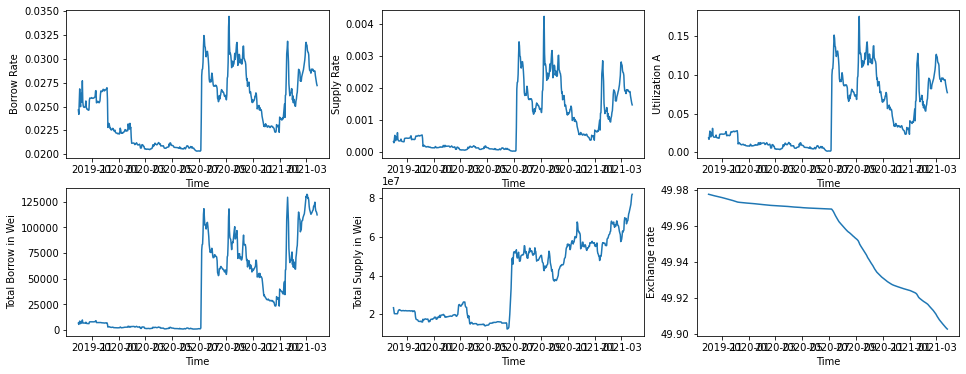

In [6]:
figsize(16,6)

plt.subplot(2,3,1)
plt.plot(BorR)
plt.xlabel('Time')
plt.ylabel('Borrow Rate')

plt.subplot(2,3,2)
plt.plot(SupR)
plt.xlabel('Time')
plt.ylabel('Supply Rate')

plt.subplot(2,3,3)
plt.plot(SupR.index, UtiR)
plt.xlabel('Time')
plt.ylabel('Utilization A')

plt.subplot(2,3,4)
plt.plot(TBor)
plt.xlabel('Time')
plt.ylabel('Total Borrow in Wei')

plt.subplot(2,3,5)
plt.plot(TSup)
plt.xlabel('Time')
plt.ylabel('Total Supply in Wei')

plt.subplot(2,3,6)
plt.plot(1/Xrate)
plt.xlabel('Time')
plt.ylabel('Exchange rate')

# plt.subplot(2,3,7)
# plt.plot(PUSD)
# plt.xlabel('Time')
# plt.ylabel('Price of ETH in USD')
plt.show()

In [7]:
# Uta[Uta.index<'2020-07-15'].describe()
# Uta[Uta.index>'2020-07-15'].describe()
UtiR[UtiR.index].describe()

count    543.000000
mean       0.045899
std        0.042588
min        0.001493
25%        0.009292
50%        0.026566
75%        0.081021
max        0.175737
dtype: float64

In [8]:
PUSD[PUSD.index>'2020-03-15'].head()

block_timestamp
2020-03-15 05:00:00    200.026494
2020-03-16 05:00:00    201.434157
2020-03-17 05:00:00    191.227066
2020-03-18 05:00:00    133.278639
2020-03-19 05:00:00    127.181926
Name: price_value, dtype: float64

# Reglas del modelo Hurricane

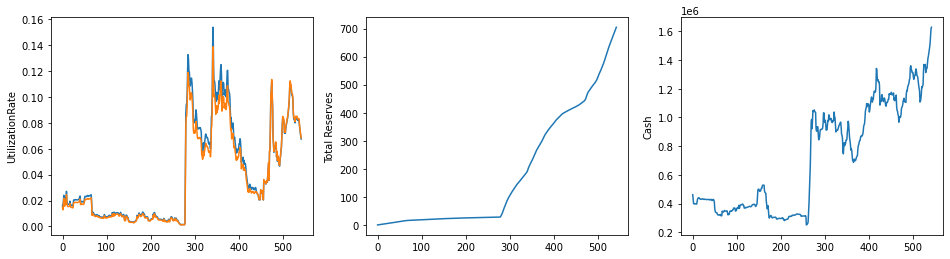

In [9]:
# Datos
br = list(cethHD["borrow_rates"])
sr = list(cethHD["supply_rates"])
er = list(cethHD["exchange_rates"])
pr = list(cethHD["prices_usd"])
tb = list(cethHD["total_borrows_history"])
ts = list(cethHD["total_supply_history"])

# A listas
BR = []; SR = []
BL = []; ER = []; PR = []
TB = []; TS = []

for i in range(len(br)):
    BR.append(br[i]["rate"])
    SR.append(sr[i]["rate"])
    BL.append(br[i]["block_number"]) # block_timestamp | block_number
    ER.append(er[i]["rate"])
    PR.append(float(pr[i]["price"]["value"]))
    TB.append(float(tb[i]["total"]["value"]))
    TS.append(float(ts[i]["total"]["value"]))
    
    # Estimaciones
blocksPerYear = 2*60*24*365
RF = 0.2

# Tasa de utilización estimada a partir de las tasas reportadas
UT = []
for r in range(len(BR)):
    UT.append(SR[r]/(BR[r]*(1-0.2)))

# Tasa de utilización estimada a partir de las cantidades en TB y TS
EUT = []
for v in range(len(TB)):
    if TB[v] != 0:
        EUT.append(TB[v]/(TS[v]*ER[v]))
    else:
        EUT.append(0)

# Métrica de espacio entre acciones
blockDelta = [0]
for b in range(1,len(BL)):
    blockDelta.append(BL[b] - BL[b-1])

# Total de reservas estimado (Compound)
TR = [0]
for a in range(1,len(TB)):
    newTR = TR[a-1] + TB[a]*blockDelta[a]*BR[a]*RF/blocksPerYear
    TR.append(newTR)

# Cash estimado
C = [TS[0]*0.02 - TB[0]]

for d in range(1,len(TS)):
    C.append(C[d-1] - (TB[d] - TB[d-1]) + TR[d] + (TS[d] - TS[d-1])*ER[d-1])
    
figsize(16,4)

plt.subplot(1,3,1)
plt.plot(UT)
plt.plot(EUT)
plt.ylabel('UtilizationRate')

plt.subplot(1,3,2)
plt.plot(TR)
plt.ylabel('Total Reserves')

plt.subplot(1,3,3)
plt.plot(C)
plt.ylabel('Cash')

plt.show()

In [10]:
# Modelo Hurricane

def tropyBR(utilizationRate):
    return utilizationRate*0.04 + 0.08

def tropySR(utilizationRate):
    return utilizationRate*0.02 + 0.03

# Tasas del modelo Hurricane
tBR = []; tSR = []

for rate in EUT:
    tBR.append(tropyBR(rate))
    tSR.append(tropySR(rate))

# Reservas del modelo Hurricane
tTR = [0]

for r in range(1,len(EUT)):
    if EUT[r] > 0.5962912017836259: # Tasa tomada de https://colab.research.google.com/drive/1_AX8r-_nojJTHPnCBEUHgrN_IlVkRNe0?authuser=1#scrollTo=zgX16XHfRiNN
        rf = (EUT[r]*tBR[r] - tSR[r]) # ReserveFactor variable
        newTR = tTR[r-1] + rf*TB[r]*blockDelta[r]*tBR[r]/blocksPerYear
    else:
        newTR = tTR[r-1]
    tTR.append(newTR)

# Intereses prometidos
promises = [0]

for a in range(1,len(C)):
    promises.append(C[a-1]*tSR[a-1]*blockDelta[a]/blocksPerYear)

# Intereses generados por las deudas
interestPerBorrows = [0]

for a in range(1,len(TB)):
    interestPerBorrows.append(TB[a-1]*tBR[a-1]*blockDelta[a]/blocksPerYear)

# Lo que sale del fondo
subsidy = [5000000000] # Tamaño inicial del fondo

for a in range(1,len(promises)):
    subsidy.append(subsidy[a-1] - max(0,promises[a] - interestPerBorrows[a]))

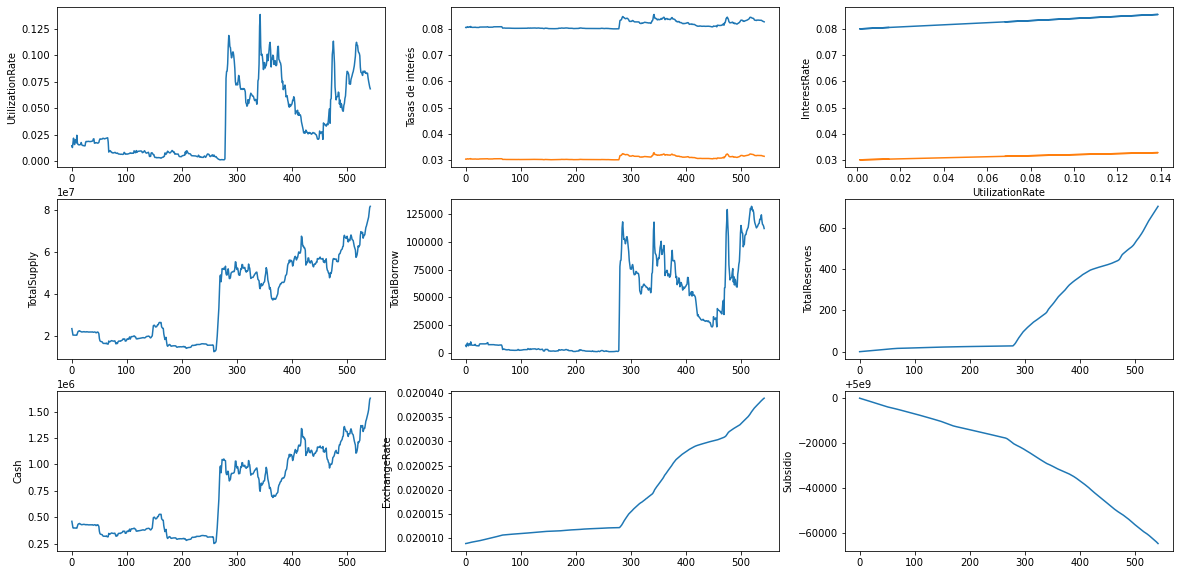

In [11]:
figsize(20,10)
n = 543 # total = 543

plt.subplot(3,3,1)
plt.plot(EUT[:n])
plt.ylabel('UtilizationRate')

plt.subplot(3,3,2)
plt.plot(tBR[:n])
plt.plot(tSR[:n])
plt.ylabel('Tasas de interés')

plt.subplot(3,3,3)
plt.plot(EUT[:n],tBR[:n])
plt.plot(EUT[:n],tSR[:n])
plt.xlabel('UtilizationRate')
plt.ylabel('InterestRate')

plt.subplot(3,3,4)
plt.plot(TS[:n])
plt.ylabel('TotalSupply')

plt.subplot(3,3,5)
plt.plot(TB[:n])
plt.ylabel('TotalBorrow')

plt.subplot(3,3,6)
plt.plot(TR[:n])
plt.ylabel('TotalReserves')

plt.subplot(3,3,7)
plt.plot(C[:n])
plt.ylabel('Cash')

plt.subplot(3,3,8)
plt.plot(ER[:n])
plt.ylabel('ExchangeRate')

plt.subplot(3,3,9)
plt.plot(subsidy[:n])
plt.ylabel('Subsidio')

plt.show()

In [12]:
#To Unix time stamp
UstartT=datetime.timestamp(startT)
UendT=datetime.timestamp(endT)

#Frequency Dayly data
freqD=abs((endT - startT).days)

params = {"asset": cDAI,
 "min_block_timestamp": int(UstartT),
 "max_block_timestamp": int(UendT),
 "num_buckets": freqD}

response = requests.get(urlcomp,params)
cdaiHD = response.json()

cdaiHD.keys()

dict_keys(['asset', 'borrow_rates', 'error', 'exchange_rates', 'prices_usd', 'supply_rates', 'total_borrows_history', 'total_supply_history'])

In [13]:
# Retrive data

# Tasas
# Borrow Rate
BorRD = json_normalize(cdaiHD['borrow_rates'],sep="_")
BorRD['rate'] = BorRD['rate'].astype(float)
BorRD.index = pd.to_datetime(BorRD['block_timestamp'], unit='s')
BorRD = BorRD.rate

# Supply Rate
SupRD = json_normalize(cdaiHD['supply_rates'],sep="_")
SupRD['rate'] = SupRD['rate'].astype(float)
SupRD.index = pd.to_datetime(SupRD['block_timestamp'], unit='s')
SupRD = SupRD.rate

# Tasa de utilización
UtiRD = pd.Series((SupRD.values/(BorRD.values*(1-0.2))),index=BorRD.index) #Reserve Factor 20%

# Cantidades

# Total Supply
TSupD = json_normalize(cdaiHD['total_supply_history'],sep="_")
TSupD['total_value'] = TSupD['total_value'].astype(float)
TSupD.index = pd.to_datetime(TSupD['block_timestamp'], unit='s')
TSupD = TSupD.total_value

# Total Borrow
TBorD = json_normalize(cdaiHD['total_borrows_history'],sep="_")
TBorD['total_value'] = TBorD['total_value'].astype(float)
TBorD.index = pd.to_datetime(TBorD['block_timestamp'], unit='s')
TBorD = TBorD.total_value

# Otros

# ExchangeRate
XrateD = json_normalize(cdaiHD['exchange_rates'],sep="_")
XrateD['rate'] = XrateD['rate'].astype(float)
XrateD.index = pd.to_datetime(XrateD['block_timestamp'], unit='s')
XrateD = XrateD.rate

# Precio
PUSDD = json_normalize(cdaiHD['prices_usd'],sep="_")
PUSDD['price_value'] = PUSDD['price_value'].astype(float)
PUSDD.index = pd.to_datetime(PUSDD['block_timestamp'], unit='s')
PUSDD = PUSDD.price_value

<ipython-input-13-47239a6bd394>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  BorRD = json_normalize(cdaiHD['borrow_rates'],sep="_")
<ipython-input-13-47239a6bd394>:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  SupRD = json_normalize(cdaiHD['supply_rates'],sep="_")
<ipython-input-13-47239a6bd394>:22: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  TSupD = json_normalize(cdaiHD['total_supply_history'],sep="_")
<ipython-input-13-47239a6bd394>:28: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  TBorD = json_normalize(cdaiHD['total_borrows_history'],sep="_")
<ipython-input-13-47239a6bd394>:36: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  XrateD = json_normalize(cdaiHD['exchange_rates'],sep="_")
<ipython-input-13-47239a6bd394>:42: FutureWarn

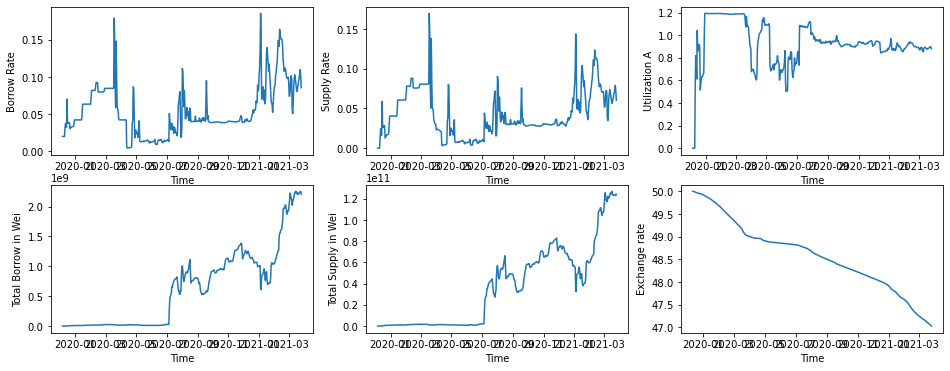

In [14]:
figsize(16,6)

plt.subplot(2,3,1)
plt.plot(BorRD)
plt.xlabel('Time')
plt.ylabel('Borrow Rate')

plt.subplot(2,3,2)
plt.plot(SupRD)
plt.xlabel('Time')
plt.ylabel('Supply Rate')

plt.subplot(2,3,3)
plt.plot(SupRD.index, UtiRD)
plt.xlabel('Time')
plt.ylabel('Utilization A')

plt.subplot(2,3,4)
plt.plot(TBorD)
plt.xlabel('Time')
plt.ylabel('Total Borrow in Wei')

plt.subplot(2,3,5)
plt.plot(TSupD)
plt.xlabel('Time')
plt.ylabel('Total Supply in Wei')

plt.subplot(2,3,6)
plt.plot(1/XrateD)
plt.xlabel('Time')
plt.ylabel('Exchange rate')

# plt.subplot(2,3,7)
# plt.plot(PUSD)
# plt.xlabel('Time')
# plt.ylabel('Price of ETH in USD')
plt.show()

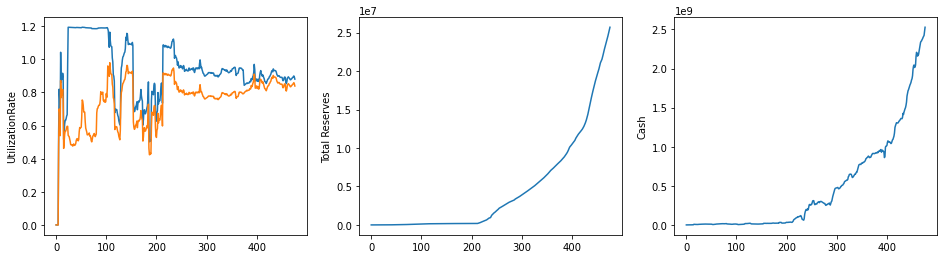

In [15]:
# Datos
brd = list(cdaiHD["borrow_rates"])
srd = list(cdaiHD["supply_rates"])
erd = list(cdaiHD["exchange_rates"])
prd = list(cdaiHD["prices_usd"])
tbd = list(cdaiHD["total_borrows_history"])
tsd = list(cdaiHD["total_supply_history"])

# A listas
BRD = []; SRD = []
BLD = []; ERD = []; PRD = []
TBD = []; TSD = []

for i in range(len(brd)):
    BRD.append(brd[i]["rate"])
    SRD.append(srd[i]["rate"])
    BLD.append(brd[i]["block_number"]) # block_timestamp | block_number
    ERD.append(erd[i]["rate"])
    PRD.append(float(prd[i]["price"]["value"]))
    TBD.append(float(tbd[i]["total"]["value"]))
    TSD.append(float(tsd[i]["total"]["value"]))
    
# Estimaciones
blocksPerYear = 2*60*24*365
RFd = 0.2

# Tasa de utilización estimada a partir de las tasas reportadas
UTD = []
for r in range(len(BRD)):
    UTD.append(SRD[r]/(BRD[r]*(1-0.2)))

# Tasa de utilización estimada a partir de las cantidades en TB y TS
EUTD = []
for v in range(len(TBD)):
    if TBD[v] != 0:
        EUTD.append(TBD[v]/(TSD[v]*ERD[v]))
    else:
        EUTD.append(0)

# Métrica de espacio entre acciones
blockDeltad = [0]
for b in range(1,len(BLD)):
    blockDeltad.append(BLD[b] - BLD[b-1])

# Total de reservas estimado (Compound)
TRD = [0]
for a in range(1,len(TBD)):
    newTRD = TRD[a-1] + TBD[a]*blockDeltad[a]*BRD[a]*RFd/blocksPerYear
    TRD.append(newTRD)

# Cash estimado
CD = [TSD[0]*0.02 - TBD[0]]

for d in range(1,len(TSD)):
    CD.append(CD[d-1] - (TBD[d] - TBD[d-1]) + TRD[d] + (TSD[d] - TSD[d-1])*ERD[d-1])
    
figsize(16,4)

plt.subplot(1,3,1)
plt.plot(UTD)
plt.plot(EUTD)
plt.ylabel('UtilizationRate')

plt.subplot(1,3,2)
plt.plot(TRD)
plt.ylabel('Total Reserves')

plt.subplot(1,3,3)
plt.plot(CD)
plt.ylabel('Cash')

plt.show()

In [16]:
#To Unix time stamp
UstartT=datetime.timestamp(startT)
UendT=datetime.timestamp(endT)

#Frequency Dayly data
freqD=abs((endT - startT).days)

params = {"asset": cUSDT,
 "min_block_timestamp": int(UstartT),
 "max_block_timestamp": int(UendT),
 "num_buckets": freqD}

response = requests.get(urlcomp,params)
cusdtHD = response.json()

cusdtHD.keys()

dict_keys(['asset', 'borrow_rates', 'error', 'exchange_rates', 'prices_usd', 'supply_rates', 'total_borrows_history', 'total_supply_history'])

In [17]:
# Retrive data

# Tasas
# Borrow Rate
BorRU = json_normalize(cusdtHD['borrow_rates'],sep="_")
BorRU['rate'] = BorRU['rate'].astype(float)
BorRU.index = pd.to_datetime(BorRU['block_timestamp'], unit='s')
BorRU = BorRU.rate

# Supply Rate
SupRU = json_normalize(cusdtHD['supply_rates'],sep="_")
SupRU['rate'] = SupRU['rate'].astype(float)
SupRU.index = pd.to_datetime(SupRU['block_timestamp'], unit='s')
SupRU = SupRU.rate

# Tasa de utilización
UtiRU = pd.Series((SupRU.values/(BorRU.values*(1-0.2))),index=BorRU.index) #Reserve Factor 20%

# Cantidades

# Total Supply
TSupU = json_normalize(cusdtHD['total_supply_history'],sep="_")
TSupU['total_value'] = TSupU['total_value'].astype(float)
TSupU.index = pd.to_datetime(TSupU['block_timestamp'], unit='s')
TSupU = TSupU.total_value

# Total Borrow
TBorU = json_normalize(cusdtHD['total_borrows_history'],sep="_")
TBorU['total_value'] = TBorU['total_value'].astype(float)
TBorU.index = pd.to_datetime(TBorU['block_timestamp'], unit='s')
TBorU = TBorU.total_value

# Otros

# ExchangeRate
XrateU = json_normalize(cusdtHD['exchange_rates'],sep="_")
XrateU['rate'] = XrateU['rate'].astype(float)
XrateU.index = pd.to_datetime(XrateU['block_timestamp'], unit='s')
XrateU = XrateU.rate

# Precio
PUSDU = json_normalize(cusdtHD['prices_usd'],sep="_")
PUSDU['price_value'] = PUSDU['price_value'].astype(float)
PUSDU.index = pd.to_datetime(PUSDU['block_timestamp'], unit='s')
PUSDU = PUSDU.price_value

<ipython-input-17-d3a6df7522dc>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  BorRU = json_normalize(cusdtHD['borrow_rates'],sep="_")
<ipython-input-17-d3a6df7522dc>:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  SupRU = json_normalize(cusdtHD['supply_rates'],sep="_")
<ipython-input-17-d3a6df7522dc>:22: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  TSupU = json_normalize(cusdtHD['total_supply_history'],sep="_")
<ipython-input-17-d3a6df7522dc>:28: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  TBorU = json_normalize(cusdtHD['total_borrows_history'],sep="_")
<ipython-input-17-d3a6df7522dc>:36: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  XrateU = json_normalize(cusdtHD['exchange_rates'],sep="_")
<ipython-input-17-d3a6df7522dc>:42: Futur

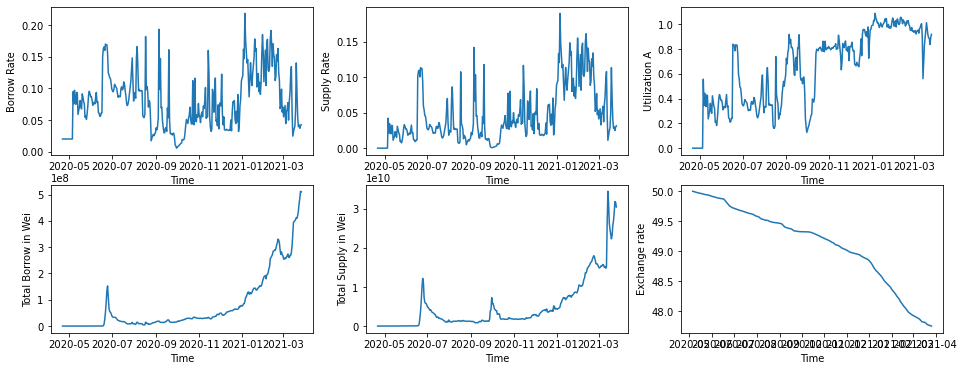

In [18]:
figsize(16,6)

plt.subplot(2,3,1)
plt.plot(BorRU)
plt.xlabel('Time')
plt.ylabel('Borrow Rate')

plt.subplot(2,3,2)
plt.plot(SupRU)
plt.xlabel('Time')
plt.ylabel('Supply Rate')

plt.subplot(2,3,3)
plt.plot(SupRU.index, UtiRU)
plt.xlabel('Time')
plt.ylabel('Utilization A')

plt.subplot(2,3,4)
plt.plot(TBorU)
plt.xlabel('Time')
plt.ylabel('Total Borrow in Wei')

plt.subplot(2,3,5)
plt.plot(TSupU)
plt.xlabel('Time')
plt.ylabel('Total Supply in Wei')

plt.subplot(2,3,6)
plt.plot(1/XrateU)
plt.xlabel('Time')
plt.ylabel('Exchange rate')

# plt.subplot(2,3,7)
# plt.plot(PUSD)
# plt.xlabel('Time')
# plt.ylabel('Price of ETH in USD')
plt.show()

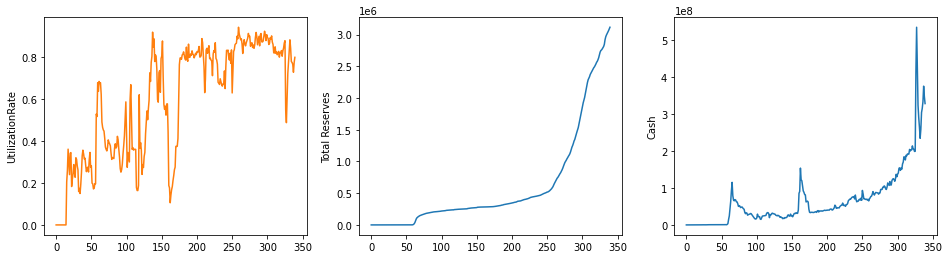

In [19]:
# Datos
bru = list(cusdtHD["borrow_rates"])
sru = list(cusdtHD["supply_rates"])
eru = list(cusdtHD["exchange_rates"])
pru = list(cusdtHD["prices_usd"])
tbu = list(cusdtHD["total_borrows_history"])
tsu = list(cusdtHD["total_supply_history"])

# A listas
BRU = []; SRU = []
BLU = []; ERU = []; PRU = []
TBU = []; TSU = []

for i in range(len(bru)):
    BRU.append(bru[i]["rate"])
    SRU.append(sru[i]["rate"])
    BLU.append(bru[i]["block_number"]) # block_timestamp | block_number
    ERU.append(eru[i]["rate"])
    PRU.append(float(pru[i]["price"]["value"]))
    TBU.append(float(tbu[i]["total"]["value"]))
    TSU.append(float(tsu[i]["total"]["value"]))
    
# Estimaciones
blocksPerYear = 2*60*24*365
RFu = 0.2

# Tasa de utilización estimada a partir de las tasas reportadas
UTU = []
for r in range(len(BRU)):
    UTD.append(SRU[r]/(BRU[r]*(1-0.2)))

# Tasa de utilización estimada a partir de las cantidades en TB y TS
EUTU = []
for v in range(len(TBU)):
    if TBU[v] != 0:
        EUTU.append(TBU[v]/(TSU[v]*ERU[v]))
    else:
        EUTU.append(0)

# Métrica de espacio entre acciones
blockDeltau = [0]
for b in range(1,len(BLU)):
    blockDeltau.append(BLU[b] - BLU[b-1])

# Total de reservas estimado (Compound)
TRU = [0]
for a in range(1,len(TBU)):
    newTRU = TRU[a-1] + TBU[a]*blockDeltau[a]*BRU[a]*RFu/blocksPerYear
    TRU.append(newTRU)

# Cash estimado
CU = [TSU[0]*0.02 - TBU[0]]

for d in range(1,len(TSU)):
    CU.append(CU[d-1] - (TBU[d] - TBU[d-1]) + TRU[d] + (TSU[d] - TSU[d-1])*ERU[d-1])
    
figsize(16,4)

plt.subplot(1,3,1)
plt.plot(UTU)
plt.plot(EUTU)
plt.ylabel('UtilizationRate')

plt.subplot(1,3,2)
plt.plot(TRU)
plt.ylabel('Total Reserves')

plt.subplot(1,3,3)
plt.plot(CU)
plt.ylabel('Cash')

plt.show()

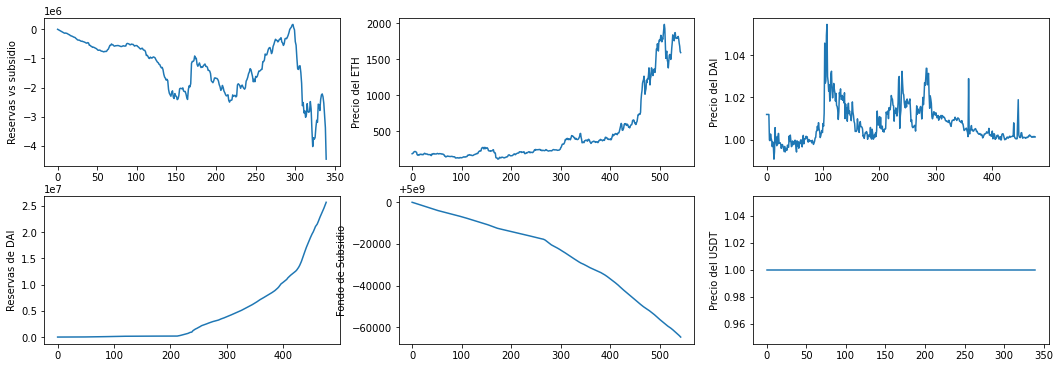

In [20]:
figsize(18,6)

earnings = []
for r in range(len(TRU)):
    earnings.append(TRD[r]*PRD[r] + TRU[r]*PRU[r]-(subsidy[0]-subsidy[r])*PR[r])
    
plt.subplot(2,3,1)
plt.plot(earnings)
plt.ylabel("Reservas vs subsidio")

plt.subplot(2,3,2)
plt.plot(PR)
plt.ylabel("Precio del ETH")

plt.subplot(2,3,3)
plt.plot(PRD)
plt.ylabel("Precio del DAI")

plt.subplot(2,3,4)
plt.plot(TRD)
plt.ylabel("Reservas de DAI")

plt.subplot(2,3,5)
plt.plot(subsidy)
plt.ylabel("Fondo de Subsidio")

plt.subplot(2,3,6)
plt.plot(PRU)
plt.ylabel("Precio del USDT")

plt.show()

# Simulación para determinar el marketCap

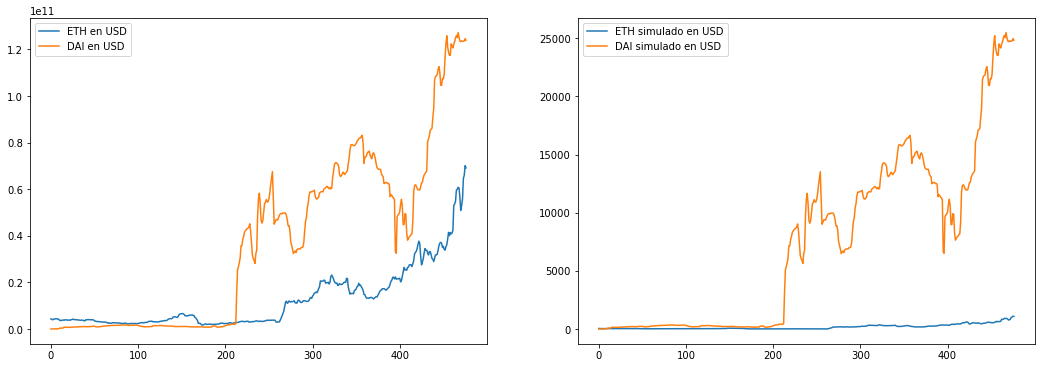

In [21]:
lenData = min(len(TS),len(TSD)) # ,len(TSU))
volM = 10
contractor = 0.00001

TS = TS[:lenData]
TSD = TSD[:lenData]
# TSU = TSU[:lenData]

TSN = []; TSmin = min(TS)
TSDN = []; TSDmin = min(TSD)
# TSUN = []; TSUmin = min(TSU)

for value in range(len(TS)):
    TSN.append((TS[value] - TSmin)*ER[value]*contractor*1/volM) # ETH
    TSDN.append((TSD[value] - TSDmin)*ER[value]*contractor) # DAI
#     TSUN.append((TSU[value] - TSUmin)*ER[value]*contractor) # USDT
    
# Comparación en USD

# Valores reales tomados del API de Compound
TSP = []
TSDP = []
# TSUP = []

for value in range(len(TS)):
    TSP.append(TS[value]*PR[value])
    TSDP.append(TSD[value]*PRD[value])
#     TSUP.append(TSU[value]*PRU[value])
    
# Valores simulados
TSNP = []
TSDNP = []
# TSUNP = []

for value in range(len(TSN)):
    TSNP.append(TSN[value]*PR[value])
    TSDNP.append(TSDN[value]*PRD[value])
#     TSUNP.append(TSUN[value]*PRU[value])
    
plt.subplot(1,2,1)
plt.plot(TSP,label = "ETH en USD")
plt.plot(TSDP,label = "DAI en USD")
# plt.plot(TSUP,label = "USDT en USD")
plt.legend()

plt.subplot(1,2,2)
plt.plot(TSNP,label = "ETH simulado en USD")
plt.plot(TSDNP,label = "DAI simulado en USD")
# plt.plot(TSUNP,label = "USDT simulado en USD")
plt.legend()

plt.show()

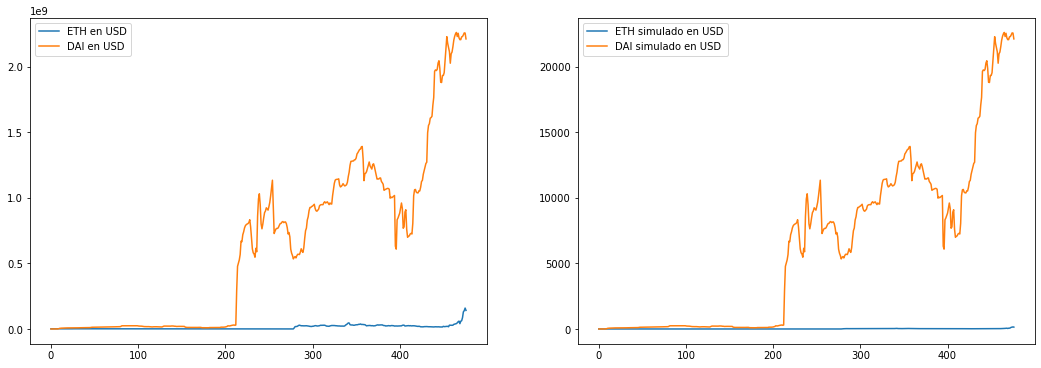

In [22]:
# lenData = min(len(TB),len(TBD),len(TBU))

TB = TB[:lenData]
TBD = TBD[:lenData]
# TBU = TBU[:lenData]

TBN = []; TBmin = min(TB)
TBDN = []; TBDmin = min(TBD)
# TBUN = []; TBUmin = min(TBU)

for value in range(len(TB)):
    TBN.append((TB[value] - TBmin)*contractor*1/volM)
    TBDN.append((TBD[value] - TBDmin)*contractor)
#     TBUN.append((TBU[value] - TBUmin)*contractor)
    
# Comparación en USD

# Valores reales tomados del API de Compound
TBP = []
TBDP = []
# TBUP = []

for value in range(len(TB)):
    TBP.append(TB[value]*PR[value])
    TBDP.append(TBD[value]*PRD[value])
#     TBUP.append(TBU[value]*PRU[value])
    
# Valores simulados
TBNP = []
TBDNP = []
# TBUNP = []

for value in range(len(TBN)):
    TBNP.append(TBN[value]*PR[value])
    TBDNP.append(TBDN[value]*PRD[value])
#     TBUNP.append(TBUN[value]*PRU[value])
    
plt.subplot(1,2,1)
plt.plot(TBP,label = "ETH en USD")
plt.plot(TBDP,label = "DAI en USD")
# plt.plot(TBUP,label = "USDT en USD")
plt.legend()

plt.subplot(1,2,2)
plt.plot(TBNP,label = "ETH simulado en USD")
plt.plot(TBDNP,label = "DAI simulado en USD")
# plt.plot(TBUNP,label = "USDT simulado en USD")
plt.legend()
plt.show()

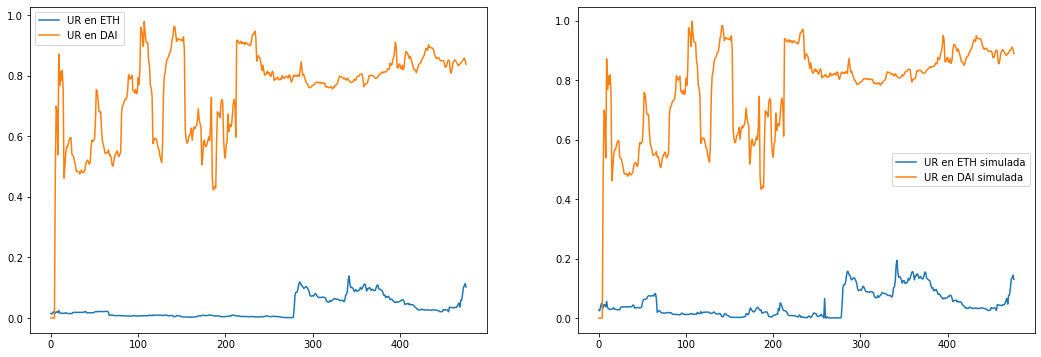

In [23]:
# Datos obtenidos de compound
UTP = []
UTDP = []
# UTUP = []

for v in range(len(TS)):
    if TS[v] != 0:
        UTP.append(TB[v]/(TS[v]*ER[v]))
    else:
        UTP.append(0)
    if TSD[v] != 0:
        UTDP.append(TBD[v]/(TSD[v]*ERD[v]))
    else:
        UTDP.append(0)
#     if TSU[v] != 0:
#         UTUP.append(TBU[v]/(TSU[v]*ERU[v]))
#     else:
#         UTUP.append(0)

# Utilizaciones simuladas
UTN = []
UTDN = []
# UTUN = []

for v in range(len(TSN)):
    if TSN[v] != 0:
        UTN.append(TBN[v]/TSN[v])
    else:
        UTN.append(0)
    if TSDN[v] != 0:
        UTDN.append(TBDN[v]/TSDN[v])
    else:
        UTDN.append(0)
#     if TSUN[v] != 0:
#         UTUN.append(TBUN[v]/TSUN[v])
#     else:
#         UTUN.append(0)
        
plt.subplot(1,2,1)
plt.plot(UTP,label="UR en ETH")
plt.plot(UTDP, label="UR en DAI")
# plt.plot(UTUP, label="UR en USDT")
plt.legend()

plt.subplot(1,2,2)
plt.plot(UTN,label="UR en ETH simulada")
plt.plot(UTDN, label="UR en DAI simulada")
# plt.plot(UTUN, label="UR en USDT simulada")
plt.legend()
plt.show()

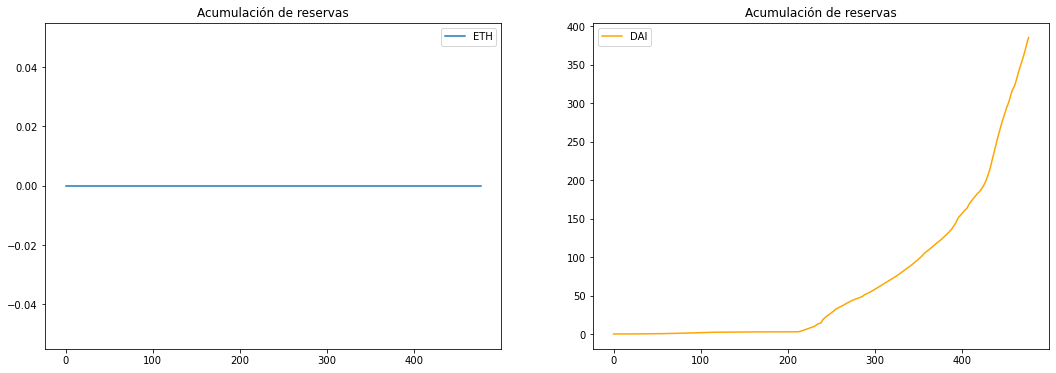

In [24]:
# Modelo Hurricane
# Parámetros
rfCompound = 0.3
baseRateBorrow = 0.08; slopeBorrow = 0.04
baseRareSupply = 0.05; slopeSupply = 0.02

def tropyBR(utilizationRate):
    return utilizationRate*slopeBorrow + baseRateBorrow

def tropySR(utilizationRate):
    return utilizationRate*slopeSupply + baseRareSupply

# Tasas del modelo Hurricane
tBR = []; tSR = []
for rate in UTDN:
    tBR.append(tropyBR(rate))
    tSR.append(tropySR(rate))
    
# Reservas del modelo Hurricane
tTR = [0]
ur1 = (slopeSupply-baseRateBorrow+((baseRateBorrow-slopeSupply)**2+4*slopeBorrow*baseRareSupply)**(1/2))/(2*slopeBorrow)
ur2 = (slopeSupply-baseRateBorrow-((baseRateBorrow-slopeSupply)**2+4*slopeBorrow*baseRareSupply)**(1/2))/(2*slopeBorrow)

OUR = max(ur1,ur2)
for r in range(1,len(UTDN)):
    if UTN[r] > OUR: 
        rf = (UTN[r]*tBR[r] - tSR[r]) # ReserveFactor variable
        newTR = (tTR[r-1] + rf*TBN[r]*blockDelta[r]*tBR[r]/blocksPerYear)
    else:
        newTR = tTR[r-1]
    tTR.append(newTR)

# Total de reservas estimado (Compound)
TRD = [0]
# TRU = [0]
for a in range(1,len(TBDN)):
    newTRD = TRD[a-1] + TBDN[a]*blockDeltad[a]*BRD[a]*rfCompound/blocksPerYear
    TRD.append(newTRD)
#     newTRU = TRU[a-1] + TBUN[a]*blockDeltau[a]*BRU[a]*rfCompound/blocksPerYear
#     TRU.append(newTRU)
    
plt.subplot(1,2,1)
plt.plot(tTR,label="ETH")
plt.legend()
plt.title("Acumulación de reservas")

plt.subplot(1,2,2)
plt.plot(TRD,label="DAI",c="orange")
# plt.plot(TRU,label="USDT",c="green")
plt.legend()
plt.title("Acumulación de reservas")
plt.show()

In [25]:
# Pagos compuestos (rendimientos para los suppliers)
TSt = [TSN[0]]

for v in range(1,len(TSN)):
    pTS = TSt[v-1]*(1+tSR[v-1]*blockDelta[v]/blocksPerYear) + (TSN[v] - TSN[v-1])
    TSt.append(pTS)
    
# plt.plot(TSt)

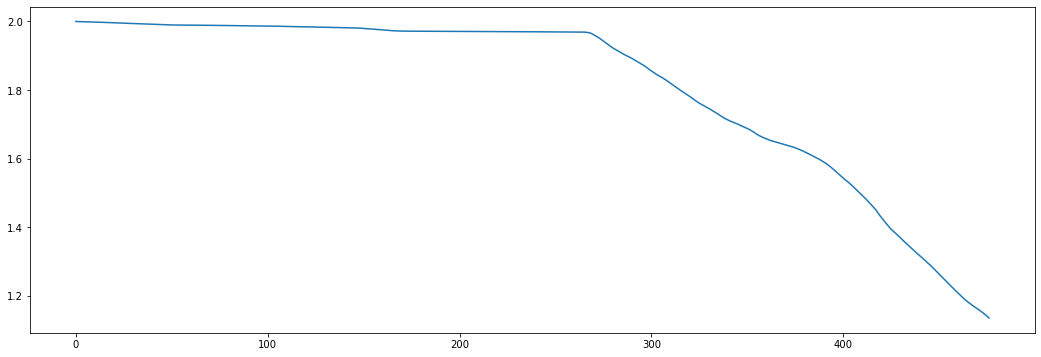

Baja de 2 a 1.99999996


In [26]:
# Cash estimado
CN = [TSt[0] - TBN[0]]

for d in range(1,len(TS)):
    CN.append(CN[d-1] - (TBN[d] - TBN[d-1]) + tTR[d] + (TSt[d] - TSt[d-1]))

# Intereses prometidos
promisesN = [0]

for a in range(1,len(TS)):
    promisesN.append(CN[a-1]*TSt[a-1]*blockDelta[a]/blocksPerYear)

# Intereses generados por las deudas
interestPerBorrowsN = [0]

for a in range(1,len(TBN)):
    interestPerBorrowsN.append(TBN[a-1]*tBR[a-1]*blockDelta[a]/blocksPerYear)

# Lo que sale del fondo
subsidyN = [2] # Tamaño inicial del fondo

for a in range(1,len(promisesN)):
    subsidyN.append(subsidyN[a-1] - max(0,promisesN[a] - interestPerBorrowsN[a]))
    
plt.plot(subsidyN)
plt.show()

print("Baja de",subsidyN[0],"a",-4*10**(-8) + 2)

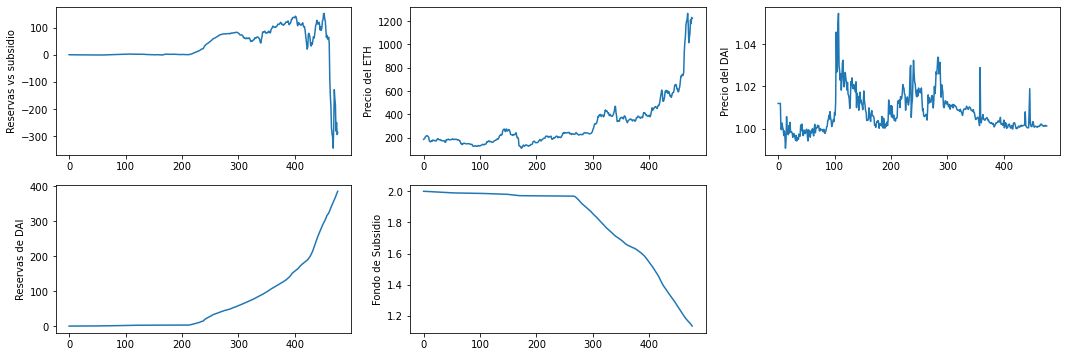

In [27]:
earnings = []
markets = 2
for r in range(len(TRD)):
    earnings.append(TRD[r]*PRD[r]*markets - (subsidyN[0]-subsidyN[r])*PR[r])
#     earnings.append(TRD[r]*PRD[r] + TRU[r]*PRU[r] - (subsidyN[0]-subsidyN[r])*PR[r])
    
plt.subplot(2,3,1)
plt.plot(earnings)
plt.ylabel("Reservas vs subsidio")

plt.subplot(2,3,2)
plt.plot(PR[:len(TRD)])
plt.ylabel("Precio del ETH")

plt.subplot(2,3,3)
plt.plot(PRD[:len(TRD)])
plt.ylabel("Precio del DAI")

plt.subplot(2,3,4)
plt.plot(TRD)
plt.ylabel("Reservas de DAI")

# plt.subplot(2,3,5)
# plt.plot(TRU)
# plt.ylabel("Reservas de USDT")

plt.subplot(2,3,5)
plt.plot(subsidyN[:len(TRD)])
plt.ylabel("Fondo de Subsidio")

plt.show()

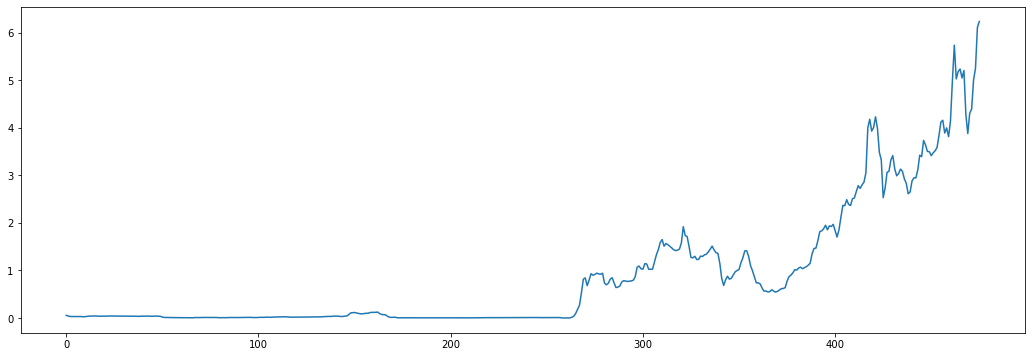

In [28]:
# Montos que se sacan del fondo por unidad de tiempo
SNP = []
for v in range(1,len(subsidyN)):
    SNP.append((subsidyN[v-1]-subsidyN[v])*PR[v])
plt.plot(SNP)
plt.show()

## Paso a precios del BTC

In [29]:
# BTCPrice = pd.read_excel("/TRU/Tropykus/Simulación/tropykus-simulation/Historico de precios/Bitcoin.xlsx")

# BTCPrice = pd.read_csv("/TRU/Tropykus/Simulación/tropykus-simulation/Historico de precios/BTC-USD.csv")
# BTCPrice.keys()

BTCPrice = pd.read_csv("/home/jorge/TRU/Tropykus/tropykus-simulation/Historico de precios/BTC-USD.csv")
BTCPrice.keys()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

<AxesSubplot:>

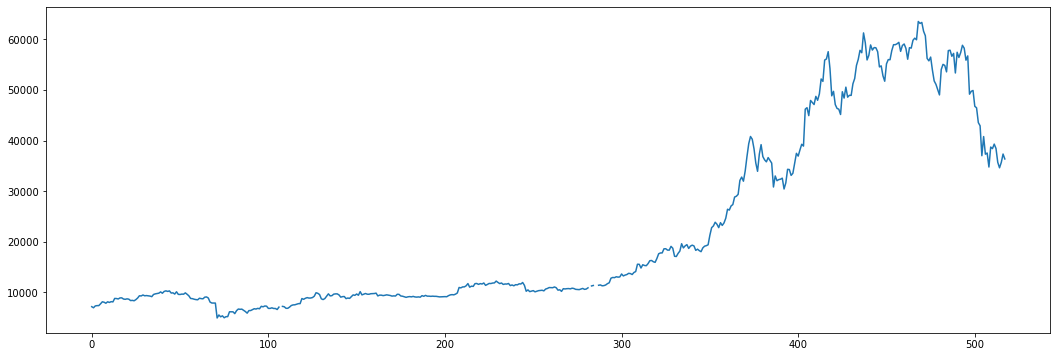

In [30]:
BTCPrice["Close"].plot()

In [31]:
print(len(BTCPrice["Close"]),lenData)

518 477


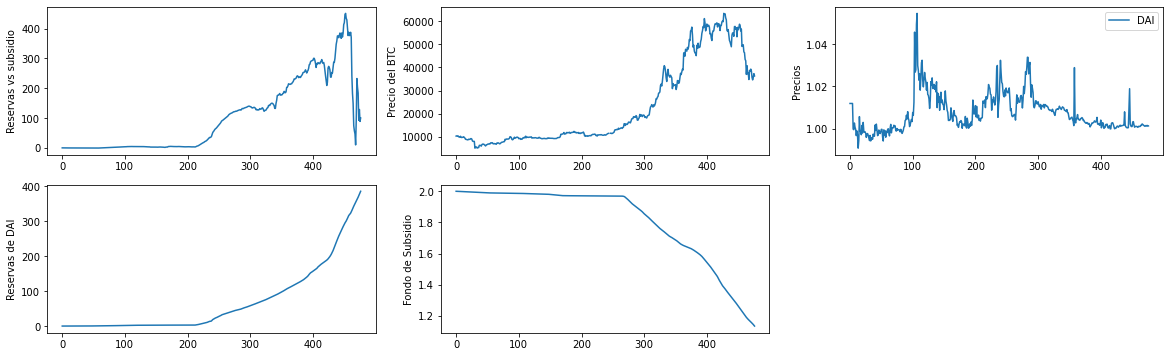

In [32]:
figsize(20,6)
earnings = []
markets = 3
BTCPricesForExample = list(BTCPrice["Close"][41:])
for r in range(len(TRD)):
    earnings.append(TRD[r]*PRD[r]*markets-(subsidyN[0]-subsidyN[r])*PR[r])
    
plt.subplot(2,3,1)
plt.plot(earnings)
plt.ylabel("Reservas vs subsidio")

plt.subplot(2,3,2)
# plt.plot(PR[:len(TRD)])
plt.plot(BTCPricesForExample[:len(TRD)])
plt.ylabel("Precio del BTC")

plt.subplot(2,3,3)
plt.plot(PRD[:len(TRD)],label="DAI")
# plt.plot(PRU[:len(TRU)],label="USDT")
plt.legend()
plt.ylabel("Precios")

plt.subplot(2,3,4)
plt.plot(TRD)
plt.ylabel("Reservas de DAI")

# plt.subplot(2,3,5)
# plt.plot(TRU)
# plt.ylabel("Reservas de USDT")

plt.subplot(2,3,5)
plt.plot(subsidyN[:len(TRD)])
plt.ylabel("Fondo de Subsidio")

plt.show()

In [33]:
earnings.index(min(earnings[300:]))

468

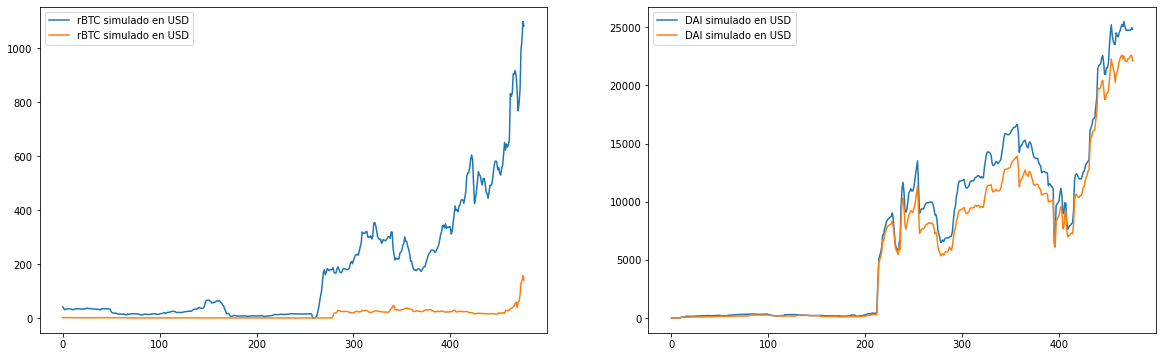

In [34]:
plt.subplot(1,2,1)
plt.plot(TSNP,label = "rBTC simulado en USD")
plt.plot(TBNP,label = "rBTC simulado en USD")
# plt.plot(TSUNP,label = "USDT simulado en USD")
plt.legend()

plt.subplot(1,2,2)
plt.plot(TSDNP,label = "DAI simulado en USD")
plt.plot(TBDNP,label = "DAI simulado en USD")
# plt.plot(TBUNP,label = "USDT simulado en USD")
plt.legend()

plt.show()

In [35]:
TSNP[468]/BTCPricesForExample[468]

0.023174170041060354

In [36]:
print(TSNP[468],TBNP[468])

896.978972994567 58.610982633446625


In [37]:
print(TSDNP[468],TBDNP[468])

25070.839594087174 22186.095809179547


In [38]:
TSNP[468]/TSDNP[468]

0.03577777958445855

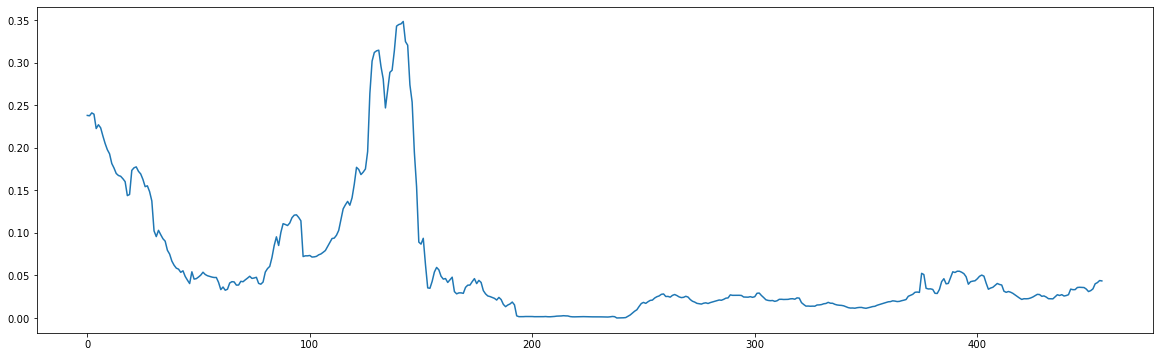

In [39]:
inc = []

for v in range(len(TSNP)):
    inc.append(TSNP[v]/(TSDNP[v]+0.00000000000001))

plt.plot(inc[20:])